# Classification trees - Level 3


# 0. Problem
You have been hired by GAP as data analysts! Your first task is to predict how many units of a limited edition jumper will be purchased by the most loyal customers. To do that you and your team have conducted a survey of 701 loyal customers. You and your team collected some valuable data including age, gender, salary, how much money the customer spent that day at the store and the last month, whether the customer has used the online shop, and how many jumpers the customer bought the last year. Some of the customers reply to the last question of the survey to make it clear whether or not they will buy the limited-edition jumper. Unfortunately, the last question was not recorded for all the interviewed people. You want to know how many of the 701 interviewed customers will buy the jumper if more than 70% of the interviewed customers are likely to buy the jumper, then the limited-edition jumper will be launched, but if the percentage is lower, unfortunately, the limited-edition jumper will not see the light. To do that we have to use a classification model!

# 1. Overview

This notebook uses decision trees to classify and predict whether the age, gender, salary, how much money the customer spent today and the last month in GAP, and how many jumpers the customer bought the last year could predict the new acquisition of a jumper.

# 2. Import the following packages

Import `Pandas` as `pd` and `Numpy` as `np` </br>
From `sklearn` import `tree` and `metrics` </br>
From `sklearn.model_selection` import `train_test_split` </br>
Import `seaborn`, and `matplotlib.pyplot` as `sns` and `plt` </br>
Import `StringIO` from `sklearn.externals.six` and `Image` from `IPython.display` </br>
Import `pydotplus`

In [113]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# 3. Load data 

Download the "WholeDataset.csv" from [GitHub](https://github.com/DecodedCo/Classification) to your working directory, save it as `WholeDataset.csv`.

Import the CSV file into Python.


In [2]:
# To read the dataset use the function read_csv from pandas
df = pd.read_csv('./datasets/WholeDataset.csv')

# 4. Explore the data

In this part of the notebook we need to:
1. Check the first 8 observations
2. Check the dimensions of the dataset
3. Print the information of `data` including the index dtype and column dtypes, non-null values and memory usage
4. Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

## Check the first 8 observations

In [3]:
# Check the first 8 rows of the dataframe
# To do that use the function head
df.head(8)

,age,gender,No_jumpers_per_year,spent_today,spent,salaRy,Distance,Online,Decision
0,36,female,0,24,73,42789,0.003168,0,1.0
1,24,M,0,44,164,74035,0.520906,0,NaN
2,24,male,0,39,119,30563,0.916005,1,1.0
3,20,male,0,30,107,13166,0.932098,1,NaN
4,24,female,0,20,36,14244,0.965881,0,1.0
5,20,female,0,23,28,14293,1.036346,1,1.0
6,34,female,0,55,202,91035,1.134851,0,1.0
7,24,female,0,20,34,17425,1.193188,0,NaN


## Check the dimensions of the dataset

In [4]:
# Get dimensions of training dataframe
# Use the attribute .shape
df.shape

(701, 9)

## Print the information of `data` including the index dtype and column dtypes, non-null values and memory usage

In [5]:
# Get high-level information on the columns
# use the .info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 9 columns):
age                    701 non-null int64
gender                 701 non-null object
No_jumpers_per_year    701 non-null int64
spent_today            701 non-null int64
spent                  701 non-null int64
salaRy                 701 non-null int64
Distance               701 non-null float64
Online                 701 non-null int64
Decision               473 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.4+ KB


## Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [6]:
# use the function .describe()
df.describe()

,age,No_jumpers_per_year,spent_today,spent,salaRy,Distance,Online,Decision
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,473.000000
mean,34.164051,2.707561,32.844508,107.834522,43860.815977,4.550152,0.532097,0.638478
std,13.777421,1.592415,15.741395,55.338217,26188.806959,3.109289,0.499325,0.480950
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.000000,62.000000,22819.000000,1.876145,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.000000,42027.000000,4.185417,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.000000,60228.000000,6.696573,1.000000,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 5. Clean the data

In this section of the notebook, we need to clean the data.
We need to:
1. Let's change the column names to something more meaningful
2. Tidy the factors of the column gender - avoid redundancy
3. Replace 1 and 0 with "Yes" and "No" in the `Decision` column

## Let's change the column names to something more meaningful
Change the name of the columns `spent` and `salaRy` to `spent_month` and `salary`, respectively

In [7]:
# Check out the column names
# use the attribute .columns
df.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_today', 'spent',
       'salaRy', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [8]:
# Change the name of the columns spent and salaRy using the function .rename()
# use the parameter column to define the old and new names
# use inplace = True
df.rename(columns={'spent': 'spent_month', 'salaRy': 'salary'}, inplace=True)

In [9]:
# Check out the column names
df.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_today', 'spent_month',
       'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

##  Tidy the factors of the column `gender` - avoid redundancy

In [10]:
# Let's have a look at the column "gender"
# Use the function .describe()
df['gender'].describe

<bound method NDFrame.describe of 0      female
1           M
2        male
3        male
4      female
5      female
6      female
7      female
8        male
9      female
10     female
11     Female
12     Female
13       male
14       male
15     female
16       Male
17       male
18     female
19     Female
20     female
21       male
22       Male
23       male
24       male
25     female
26          M
27     female
28       male
29       male
        ...  
671    Female
672    female
673    female
674    female
675      male
676    female
677      Male
678      male
679      male
680    Female
681    female
682    Female
683    female
684      male
685      male
686    female
687      male
688    female
689      male
690      male
691      male
692    female
693      male
694      male
695      male
696    female
697    female
698      male
699      male
700    female
Name: gender, Length: 701, dtype: object>

In [11]:
# Let's check the unique values of the column "gender"
df.gender.unique()

array(['female', 'M', 'male', 'Female', 'Male', 'm'], dtype=object)

Replace the redundant values of the column `gender` using only `Female` and `Male`

In [12]:
# Use the function .replace() on the column "gender"; replace female with Female
df.gender.replace(['female'], 'Female', inplace=True)

In [13]:
# Let's check the unique values of the column "gender"
df.gender.unique()

array(['Female', 'M', 'male', 'Male', 'm'], dtype=object)

In [14]:
# Use the function .replace() on the column "gender"; replace "male", "M", "m" with "Male"
df.gender.replace(['male', 'M', 'm'], 'Male', inplace=True)

In [15]:
# Let's check the unique values of the column "gender"
df.gender.unique()

array(['Female', 'Male'], dtype=object)

## Replace 1 and 0 with "Yes" and "No" in the `Decision` column

In [16]:
df.Decision.unique()

array([ 1., nan,  0.])

In [17]:
# use the function .replace() on the column 'Decision'; replace 1 and 0 with "YES" and "NO"
df.Decision.replace([1, 0], ['YES', 'NO'], inplace=True)

In [18]:
df.Decision.unique()

array(['YES', nan, 'NO'], dtype=object)

# 6. Spliting the dataset into NOPredict and Predict
In this section of the notebook we need to:
1. Drop all the empty values of the `Decision` column and save it as NOPredict
2. Explore the data using boxplots and scatter plots of several variables in the y-axis and the decision on the x-axis
3. Use the subset with all empty values in the column `Decision` and save it as Predict
4. Divide the NOPredict subset into X and y, and then into train and test subsets for X and y
5. Create the dummy variables to deal with categorical inputs

## Drop all the empty values of the `Decision` column and save it as NOPredict

In [19]:
# NoPredict is the dataset with the known values for the decision
# Use the function .dropna()
NOPredict = df.loc[~df.Decision.isnull()]
NOPredict.describe()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,35.302326,2.585624,32.579281,106.594080,44794.543340,5.090660,0.513742
std,13.384294,1.583002,15.772030,56.084758,25558.295876,3.347834,0.500340
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27459.000000,2.069169,0.000000
50%,29.000000,3.000000,35.000000,113.000000,42794.000000,4.831928,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61629.000000,7.848927,1.000000
max,67.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000


In [20]:
NOPredict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 699
Data columns (total 9 columns):
age                    473 non-null int64
gender                 473 non-null object
No_jumpers_per_year    473 non-null int64
spent_today            473 non-null int64
spent_month            473 non-null int64
salary                 473 non-null int64
Distance               473 non-null float64
Online                 473 non-null int64
Decision               473 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


## Explore the data using boxplots and scatter plots of several variables in the y-axis and the decision on the x-axis

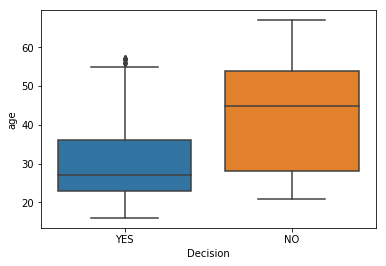

In [21]:
# Exploring the NOPredict
# Select for the y axis any variable and compare it with the decision column
# Can you find a single variable that will help us to classify the decision column
sns.boxplot(y='age', x='Decision', data=NOPredict )
plt.show()

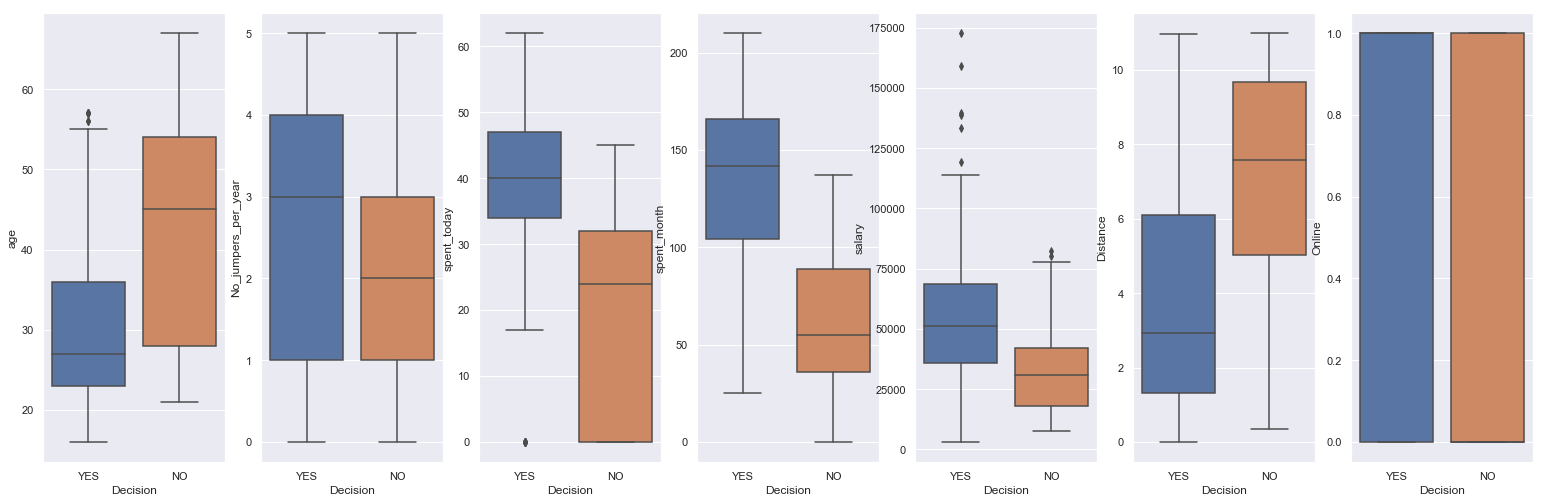

In [22]:
sns.set(rc={'figure.figsize':(26.7,8.27)})
fig, axes = plt.subplots(1, 7)
for i, var in enumerate(['age', 'No_jumpers_per_year', 'spent_today', 'spent_month', 'salary', 'Distance', 'Online']):
    ax = sns.boxplot(y=var, x='Decision', data=NOPredict, orient='v', ax=axes[i])

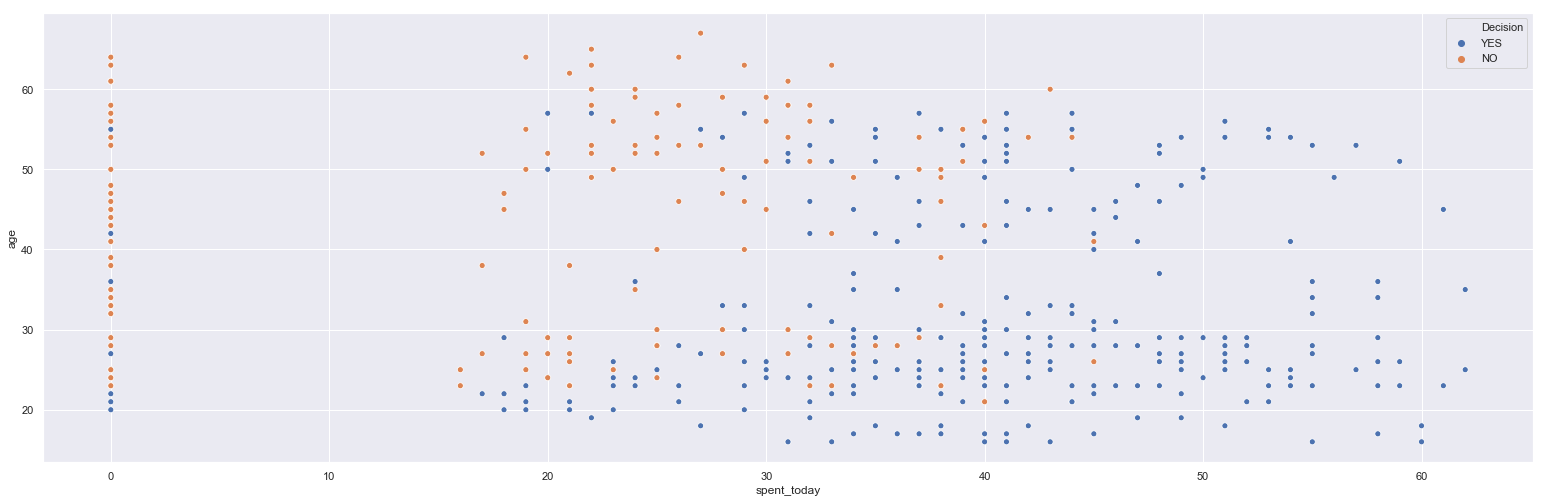

In [23]:
# Exploring the NOPredict
# Select for the x and y axis any variable and compare them with the decision column using the parameter hue = "Decision"
# Can you find a single variable that will help us to classify the decision column
sns.scatterplot(x='spent_today', y='age', data=NOPredict, hue='Decision')

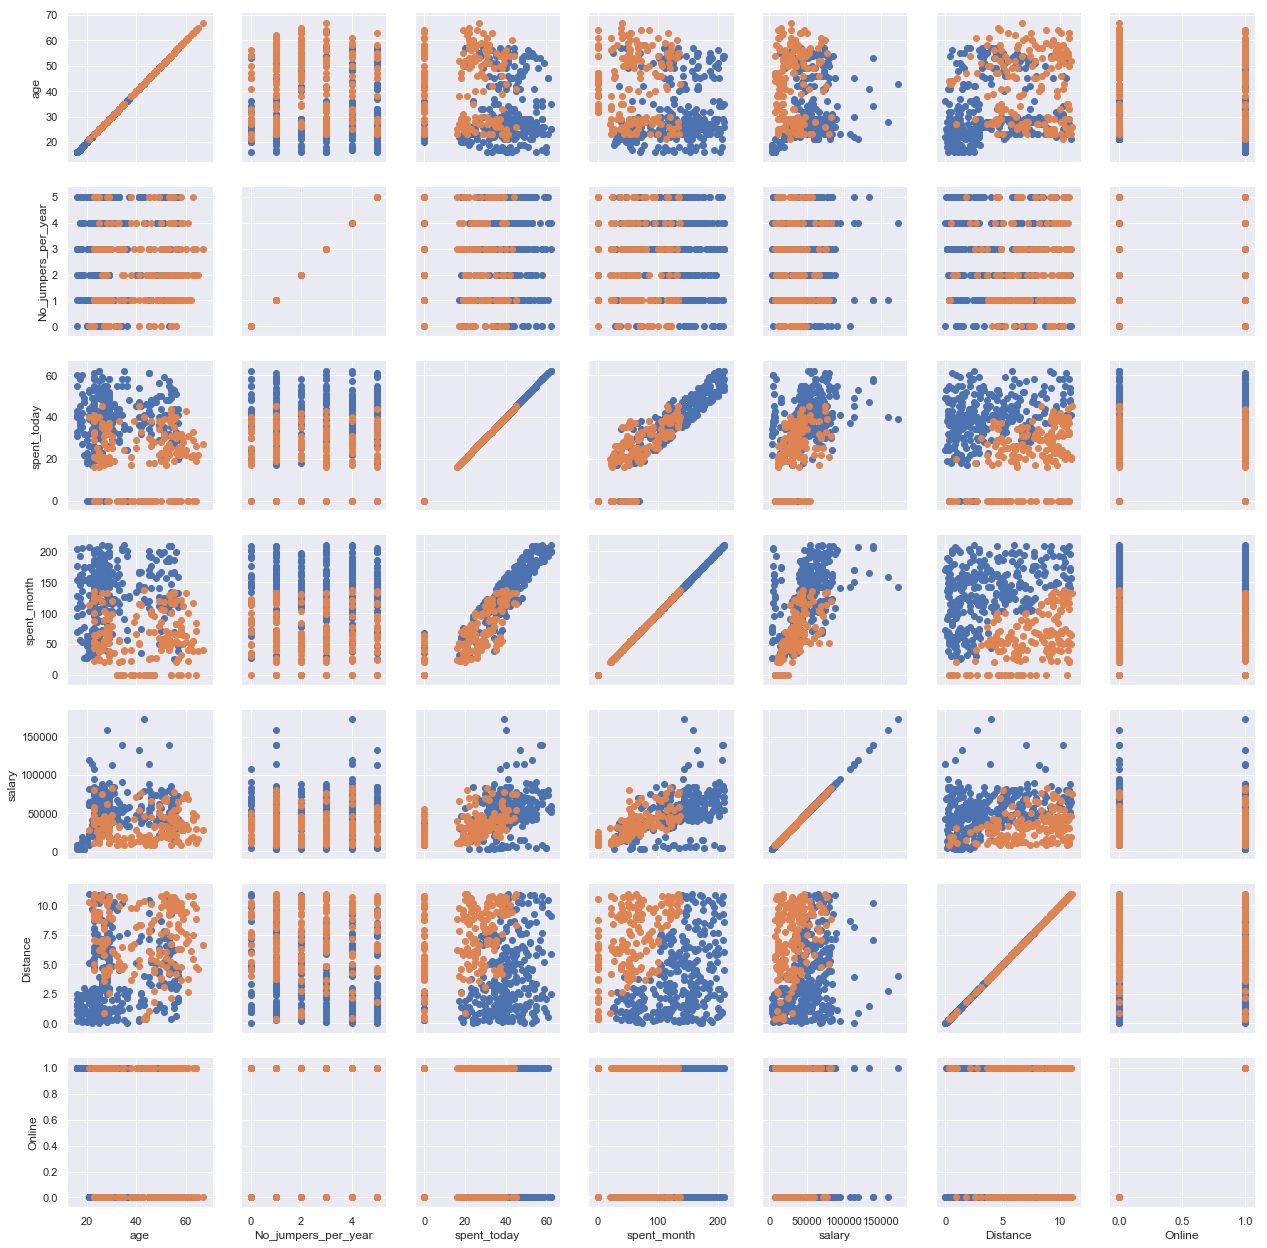

In [24]:
g = sns.PairGrid(NOPredict, hue='Decision')
g.map(plt.scatter);

## Use the subset with all empty values in the column `Decision` and save it as Predict

In [25]:
# use the function pd.isnull to subset the data with only null values
Predict = df.loc[df.Decision.isnull()]
Predict.head()

,age,gender,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN


In [26]:
# use .describe to see a summary of Predict
Predict.describe()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [27]:
#Let's check the names of the columns first
NOPredict.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_today', 'spent_month',
       'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

## Divide the NOPredict subset into X and y

In [28]:
# Feature selection 
feature_cols = ["age", "gender", "No_jumpers_per_year", "spent_today", "spent_month",
       "salary", "Distance", "Online"]
X = NOPredict[feature_cols]
y = NOPredict.Decision

## Subset X and y into X_train, X_test, y_train, y_test

In [29]:
# Subset X and y using the function train_test_split
# call the results X_train, X_test, y_train, y_test
# use 75% for the train size
# set the random seed to 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

## Create the dummy variables to deal with categorical inputs

In [30]:
# One-hot encoding all features in training set
X_train = pd.get_dummies(X_train )

# One-hot encoding all features in testing set
X_test = pd.get_dummies(X_test)

# 7. Running the model 
Let's check the documentation of scikit-learn about decision trees https://scikit-learn.org/stable/modules/tree.html </br>
Check out in particular section `1.10.5. Tips on practical use`

Your facilitator will be walking through this section

## Entropy model - no max_depth

In [31]:
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
y_pred = pd.Series(y_pred)
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

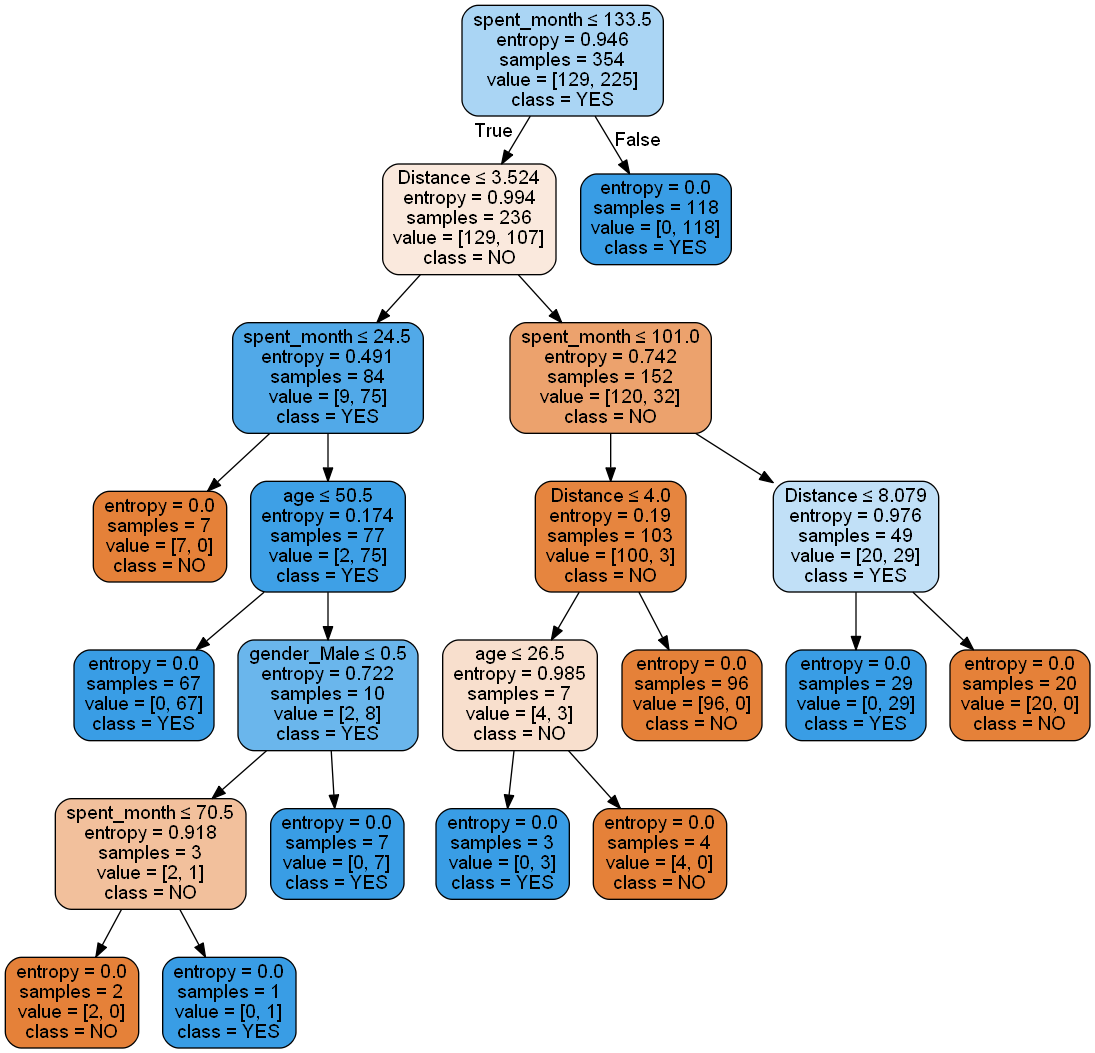

In [32]:
dot_data = StringIO()
tree.export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9642857142857143
Precision score for "Yes" 0.9625
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.9285714285714286


## Gini impurity model - no max_depth

In [34]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
y_pred = pd.Series(y_pred)
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

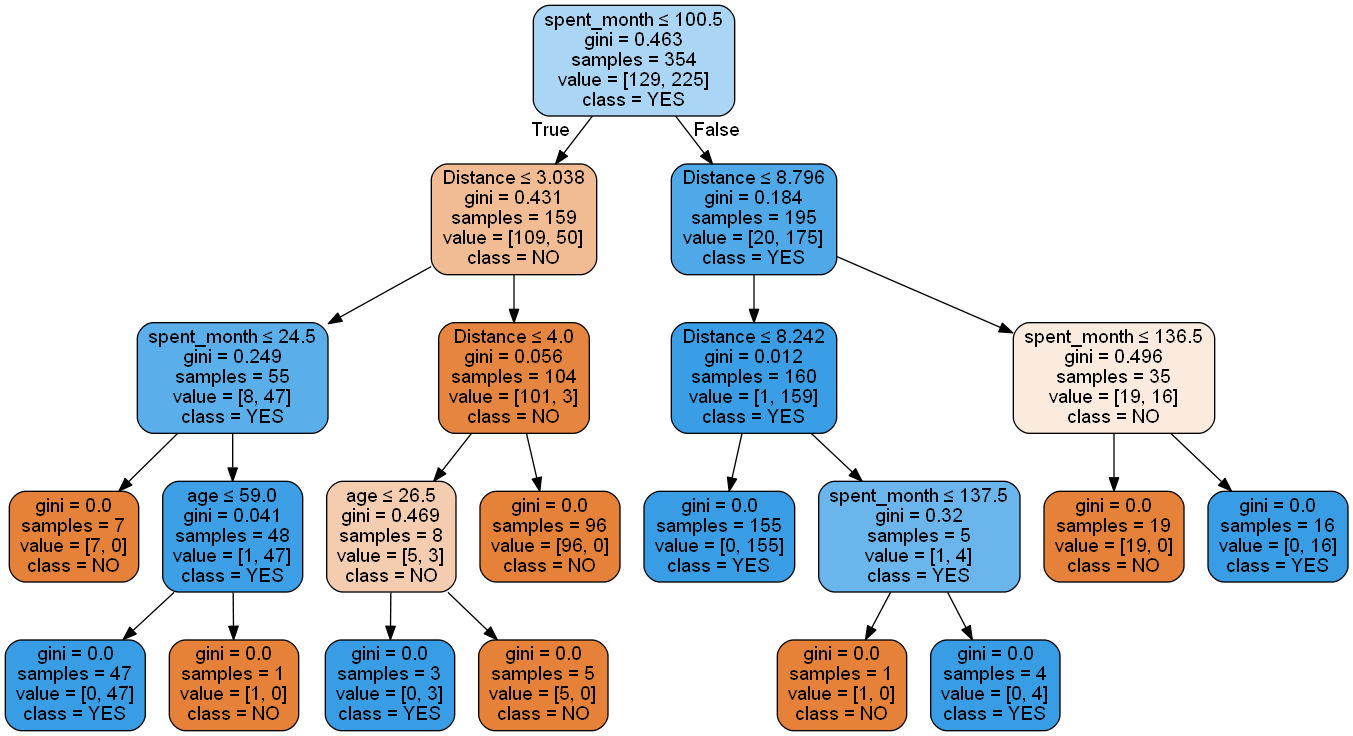

In [35]:
dot_data = StringIO()
tree.export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9761904761904762
Precision score 0.9746835443037974
Recall score 0.9523809523809523


## Entropy model model - max_depth 3

In [37]:
clf_entropy_3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
clf_entropy_3.fit(X_train, y_train)
y_pred = clf_entropy_3.predict(X_test)
y_pred = pd.Series(y_pred)
clf_entropy_3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

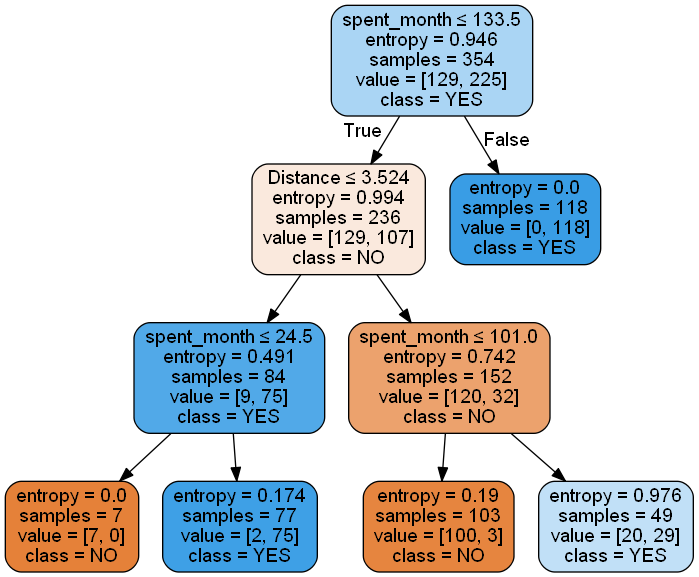

In [38]:
dot_data = StringIO()
tree.export_graphviz(clf_entropy_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.8991596638655462
Balanced accuracy: 0.8571428571428572
Precision score for "Yes" 0.8651685393258427
Recall score for "No" 0.7142857142857143


## Gini impurity  model - max depth 3

In [40]:
clf_gini_3 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)
clf_gini_3.fit(X_train, y_train)
y_pred = clf_gini_3.predict(X_test)
y_pred = pd.Series(y_pred)
clf_gini_3

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

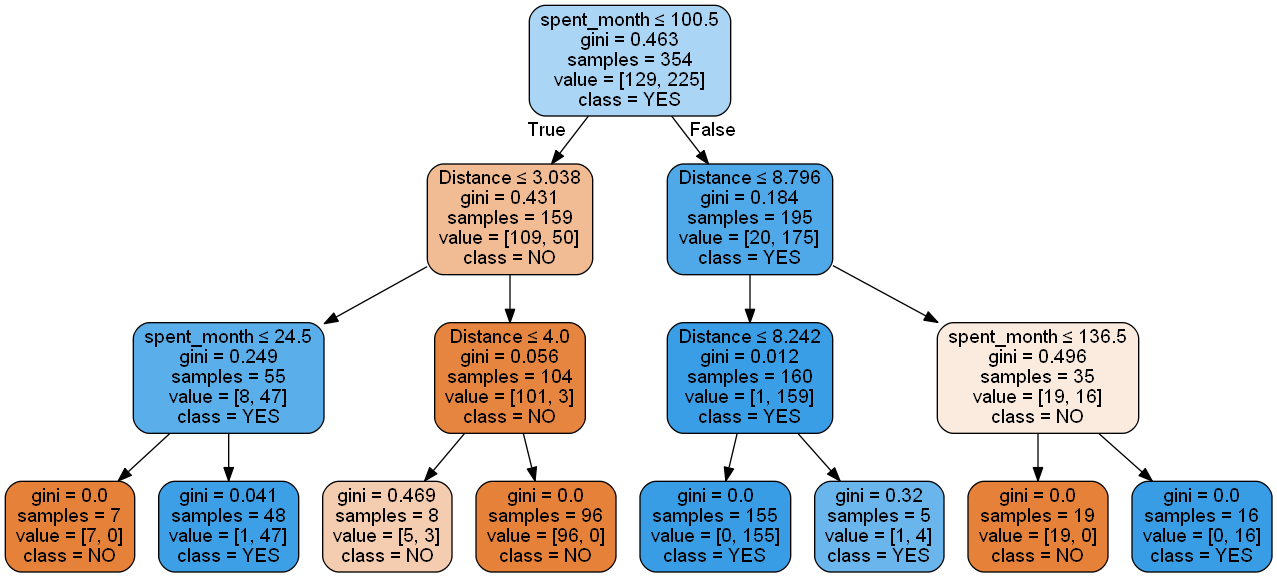

In [41]:
dot_data = StringIO()
tree.export_graphviz(clf_gini_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9642857142857143
Precision score 0.9625
Recall score 0.9285714285714286


### Which model are you going to use?

## Now it is time to count how many loyal customers are going to buy the jumper
 1. Let's calculate from the original dataset how many loyal customers said originally and explicitly that they will purchase the limited-edition jumper

In [43]:
df["Decision"].value_counts()

YES    302
NO     171
Name: Decision, dtype: int64

2. Let's calculate the number of people that according to the model will be willing to purchase the jumper </br>
a. Subset the Predict dataset into `new_X` considering all the variables except `Decision` </br>
b. Use that dataset to predict a new variable called `potential_buyers`

In [44]:
# Feature selection 
feature_cols = ["age", "gender", "No_jumpers_per_year", "spent_today", "spent_month",
       "salary", "Distance", "Online"]
new_X = Predict[feature_cols]

In [45]:
# One-hot encoding all features in training set
new_X = pd.get_dummies(new_X)
potential_buyers = clf_gini.predict(new_X)

In [46]:
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 51, 177], dtype=int64))

The total number of potential buyers is 302 + 177 = 479

In [47]:
print("The total number of interviewed people was", df.salary.count())

The total number of interviewed people was 701


In [48]:
# Let's calculate the proportion of buyers
479/701

0.6833095577746077

In [49]:
print("Only ", round((479/701)*100, 2), "% of people want to buy the limited edition jumper" )

Only  68.33 % of people want to buy the limited edition jumper


In [50]:
potential_buyers_entropy = clf_entropy.predict(new_X)
np.unique(potential_buyers_entropy, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 49, 179], dtype=int64))

In [51]:
potential_buyers_entropy3 = clf_entropy_3.predict(new_X)
np.unique(potential_buyers_entropy3, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183], dtype=int64))

In [52]:
potential_buyers_gini3 = clf_gini_3.predict(new_X)
np.unique(potential_buyers_gini3, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 51, 177], dtype=int64))

## Let's try Random Forst Classifier

In [53]:
clf_rfc_3 = RandomForestClassifier(n_estimators=250, max_depth=3, random_state=1234)
clf_rfc_3.fit(X_train, y_train)
y_pred = clf_rfc_3.predict(X_test)
y_pred = pd.Series(y_pred)
clf_rfc_3

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [54]:
print(clf_rfc_3.feature_importances_)

[0.08757526 0.01689583 0.21732132 0.32885049 0.08227029 0.26314981
 0.00095156 0.00148719 0.00149824]


In [55]:
potential_buyers_rfc3 = clf_rfc_3.predict(new_X)
np.unique(potential_buyers_rfc3, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 39, 189], dtype=int64))

In [56]:
np.unique(potential_buyers_rfc3, return_counts=True)[1][1]

189

In [57]:
(302+189)/701

0.7004279600570613

## Let's try something a bit more fun

### With original unscaled data

In [160]:
# let's define a list of models
models = [LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1234),
          GaussianNB(),
          LinearSVC(C=1.0, max_iter=10000, random_state=1234),
          RandomForestClassifier(n_estimators=250, max_depth=3, random_state=1234),
          SVC(C=10.0, max_iter=10000, random_state=1234, gamma=0.0007)]
# models = [RandomForestClassifier(n_estimators=250, max_depth=3, random_state=1234)]

In [161]:
for clf in models:
    print
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = pd.Series(y_pred)
    potential_buyers_ = clf.predict(new_X)
    #print(np.unique(potential_buyers_, return_counts=True))
    pred_ct = np.unique(potential_buyers_, return_counts=True)
    yes_idx = np.where(pred_ct[0]=='YES')[0][0]
    nb_yes = pred_ct[1][yes_idx]
    print('{}'.format(clf.__class__.__name__))
    print('\tAccuracy: {}'.format(metrics.accuracy_score(y_test,y_pred)))
    print('\tBalanced accuracy: {}'.format(metrics.balanced_accuracy_score(y_test,y_pred)))
    print('\tPrecision score: {}'.format(metrics.precision_score(y_test,y_pred, pos_label = "YES")))
    print('\tRecall score: {}'.format(metrics.recall_score(y_test,y_pred, pos_label = "NO")))
    print('\tNumber of predicted YES: {}'.format(nb_yes))
    print('\tTotal % of YES: {}'.format((302+nb_yes)/701))
    print('')

LogisticRegression
	Accuracy: 0.9411764705882353
	Balanced accuracy: 0.9274891774891775
	Precision score: 0.9375
	Recall score: 0.8809523809523809
	Number of predicted YES: 190
	Total % of YES: 0.7018544935805991

GaussianNB
	Accuracy: 0.8319327731092437
	Balanced accuracy: 0.8051948051948052
	Precision score: 0.8518518518518519
	Recall score: 0.7142857142857143
	Number of predicted YES: 171
	Total % of YES: 0.6747503566333809



C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
	Accuracy: 0.7142857142857143
	Balanced accuracy: 0.6006493506493507
	Precision score: 0.6972477064220184
	Recall score: 0.21428571428571427
	Number of predicted YES: 215
	Total % of YES: 0.7375178316690443

RandomForestClassifier
	Accuracy: 0.907563025210084
	Balanced accuracy: 0.8744588744588744
	Precision score: 0.8837209302325582
	Recall score: 0.7619047619047619
	Number of predicted YES: 189
	Total % of YES: 0.7004279600570613

SVC
	Accuracy: 0.6974789915966386
	Balanced accuracy: 0.5714285714285714
	Precision score: 0.6814159292035398
	Recall score: 0.14285714285714285
	Number of predicted YES: 215
	Total % of YES: 0.7375178316690443



### With scaled data

In [60]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
new_X_scaled = new_X.copy()
X_train_scaled[list(X_train.columns[:6])] = x_scaler.fit_transform(X_train[X_train.columns[:6]])
X_test_scaled[list(X_test.columns[:6])] = x_scaler.transform(X_test[X_test.columns[:6]])
new_X_scaled[list(new_X.columns[:6])] = x_scaler.transform(new_X[new_X.columns[:6]])
X_train_scaled.head()

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online,gender_Female,gender_Male
244,1.408427,-0.345998,1.318371,1.443999,0.094381,-0.517444,0,1,0
141,-0.573573,-0.983932,0.739973,0.388886,-0.213342,0.138703,1,0,1
385,-0.793795,0.291936,-2.087754,-1.113310,-1.147715,-0.340983,0,0,1
423,1.114797,0.291936,0.033041,-0.004547,1.215070,0.653879,0,1,0
69,-1.160832,-0.983932,-0.738157,-0.898711,-1.205009,-1.313857,1,1,0


In [61]:
X_test_scaled.head()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online,gender_Female,gender_Male
518,-0.646980,0.929870,0.547173,0.979034,1.534316,-0.189342,0,1,0
152,1.775463,-0.983932,-0.545358,-0.755644,-0.398662,0.524339,1,1,0
213,-1.307647,-0.345998,0.611440,0.120636,-0.991900,-1.185806,1,1,0
558,-0.500166,0.929870,1.125572,1.676482,1.812017,0.798822,0,0,1
260,1.628649,-0.345998,-2.087754,-1.882291,-1.409228,-0.088995,1,0,1


In [62]:
new_X_scaled.head()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online,gender_Female,gender_Male
1,-0.867203,-1.621866,0.739973,1.050567,1.196212,-1.393752,0,0,1
3,-1.160832,-1.621866,-0.159759,0.031220,-1.230686,-1.267861,1,0,1
7,-0.867203,-1.621866,-0.802424,-1.274260,-1.060876,-1.187925,0,1,0
11,-0.867203,-1.621866,0.482907,0.853851,1.625541,-1.046506,1,1,0
12,-1.087425,-1.621866,0.354374,0.299469,-0.067574,-1.028417,1,1,0


In [63]:
# let's define a list of models
models = [LogisticRegression(solver='lbfgs'),
          GaussianNB(),
          LinearSVC(C=1.0, max_iter=10000, random_state=1234),
          RandomForestClassifier(n_estimators=250, max_depth=3, random_state=1234)]
# models = [RandomForestClassifier(n_estimators=250, max_depth=3, random_state=1234)]

In [64]:
for clf in models:
    print
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred = pd.Series(y_pred)
    potential_buyers_ = clf.predict(new_X_scaled)
    nb_yes = np.unique(potential_buyers_, return_counts=True)[1][1]
    print('{}'.format(clf.__class__.__name__))
    print('\tAccuracy: {}'.format(metrics.accuracy_score(y_test,y_pred)))
    print('\tBalanced accuracy: {}'.format(metrics.balanced_accuracy_score(y_test,y_pred)))
    print('\tPrecision score: {}'.format(metrics.precision_score(y_test,y_pred, pos_label = "YES")))
    print('\tRecall score: {}'.format(metrics.recall_score(y_test,y_pred, pos_label = "NO")))
    print('\tNumber of predicted YES: {}'.format(nb_yes))
    print('\tTotal % of YES: {}'.format((302+nb_yes)/701))
    print('')

LogisticRegression
	Accuracy: 0.9243697478991597
	Balanced accuracy: 0.9090909090909091
	Precision score: 0.925
	Recall score: 0.8571428571428571
	Number of predicted YES: 191
	Total % of YES: 0.703281027104137

GaussianNB
	Accuracy: 0.8403361344537815
	Balanced accuracy: 0.8062770562770563
	Precision score: 0.8452380952380952
	Recall score: 0.6904761904761905
	Number of predicted YES: 172
	Total % of YES: 0.6761768901569187

LinearSVC
	Accuracy: 0.9159663865546218
	Balanced accuracy: 0.9025974025974026
	Precision score: 0.9240506329113924
	Recall score: 0.8571428571428571
	Number of predicted YES: 190
	Total % of YES: 0.7018544935805991

RandomForestClassifier
	Accuracy: 0.8991596638655462
	Balanced accuracy: 0.8625541125541125
	Precision score: 0.8735632183908046
	Recall score: 0.7380952380952381
	Number of predicted YES: 189
	Total % of YES: 0.7004279600570613



Scaling the data doesn't seem to have much influence (surprisingly)!

### Exploring SVC with grid search

In [67]:
from sklearn.model_selection import GridSearchCV

In [153]:
k = ['rbf', 'linear','poly', 'sigmoid']
c = np.arange(0,100,10)[1:]
g = np.arange(1e-4,1e-3,1e-4)
g = g.tolist()
param_grid = dict(kernel=k, C=c, gamma=g, random_state=[1234], max_iter=[30000])

In [154]:
param_grid

{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
 'C': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'gamma': [0.0001,
  0.0002,
  0.00030000000000000003,
  0.0004,
  0.0005,
  0.0006000000000000001,
  0.0007000000000000001,
  0.0008,
  0.0009000000000000001],
 'random_state': [1234],
 'max_iter': [30000]}

In [155]:
svc = svm.SVC(gamma='auto')
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\thomas\Anaconda3\envs\ml368\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Converge

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': array([10, 20, 30, 40, 50, 60, 70, 80, 90]), 'gamma': [0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001], 'random_state': [1234], 'max_iter': [30000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0007000000000000001,
  kernel='rbf', max_iter=30000, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [157]:
grid.best_params_

{'C': 10,
 'gamma': 0.0007000000000000001,
 'kernel': 'rbf',
 'max_iter': 30000,
 'random_state': 1234}

In [159]:
grid.best_score_

0.692090395480226

In [158]:
potential_buyers_best = grid.best_estimator_.predict(new_X)
np.unique(potential_buyers_best, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 13, 215], dtype=int64))

## Conclusion
Better to use Gini impurity  model - max depth 3 (clf_entropy_3) as it yields more potential buyers!

Well actually the random forest classifier - max depth 3 is even better! And with this one we actually get to launch our new jumper :)


Going further: look at getting our data better balanced: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/